# Decision Tree Regression and hyperparamter tunning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_diabetes
ds = load_diabetes()

In [3]:
df = pd.DataFrame(ds.data, columns=ds.feature_names)

In [4]:
print(ds["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [5]:
# INDEPEDNENT FEATURE
x = df
# dependent Feature
y = ds.target

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = 42)

In [7]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor()

In [8]:
param_grid = {
    'criterion': ["squared_error", "friedman_mse", "absolute_error",'poisson'],
    'max_depth': [None,1,2,3,4, 10, 20, 30, 40],
    "splitter" :["best", "random"],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    #'max_leaf_nodes': [None, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.01, 0.1],
    'ccp_alpha': [0.0, 0.01, 0.1, 1.0],
    # 'min_samples_split': [2, 5, 10, 15],
    # 'min_samples_leaf': [1, 2, 5, 10]

}


In [9]:
from sklearn.model_selection import GridSearchCV
cv =  GridSearchCV(
    estimator=tree1,
    param_grid=param_grid,  
    refit=True,
    verbose=1,
    cv=5,
    n_jobs = -1,
    scoring = "neg_mean_absolute_error"
)

In [10]:
cv.fit(x_train,y_train)

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.01, 0.1, 1.0],
                         'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [None, 1, 2, 3, 4, 10, 20, 30, 40],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_impurity_decrease': [0.0, 0.01, 0.1],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_absolute_error', verbose=1)

In [11]:
cv.best_params_

{'ccp_alpha': 1.0,
 'criterion': 'absolute_error',
 'max_depth': 3,
 'max_features': 'log2',
 'min_impurity_decrease': 0.01,
 'splitter': 'best'}

In [12]:
cv.best_score_

np.float64(-48.15315895372233)

In [13]:
y_pred = cv.predict(x_test)

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print the performance metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error: 56.66
Mean Squared Error: 5454.15
R^2 Score: -0.03


In [15]:
### If u want to see the decison tree of this so put the param in decion

In [16]:
tree1 = DecisionTreeRegressor(ccp_alpha= 0.01,
 criterion= 'poisson',
 max_depth= None,
 max_features= None,
 min_impurity_decrease=0.1,
 splitter= 'random')

In [17]:
tree1.fit(x_train,y_train)
y_pred = tree1.predict(x_test)

[Text(0.5462962962962963, 0.9375, 'x[2] <= 0.018\npoisson = 20.018\nsamples = 353\nvalue = 153.737'),
 Text(0.2777777777777778, 0.8125, 'x[7] <= 0.03\npoisson = 15.756\nsamples = 240\nvalue = 126.217'),
 Text(0.41203703703703703, 0.875, 'True  '),
 Text(0.18518518518518517, 0.6875, 'x[8] <= -0.041\npoisson = 13.615\nsamples = 178\nvalue = 110.949'),
 Text(0.1111111111111111, 0.5625, 'x[4] <= -0.044\npoisson = 9.43\nsamples = 53\nvalue = 86.151'),
 Text(0.07407407407407407, 0.4375, 'x[2] <= -0.002\npoisson = 9.592\nsamples = 28\nvalue = 98.25'),
 Text(0.037037037037037035, 0.3125, 'poisson = 8.349\nsamples = 27\nvalue = 94.444'),
 Text(0.1111111111111111, 0.3125, 'poisson = 0.0\nsamples = 1\nvalue = 201.0'),
 Text(0.14814814814814814, 0.4375, 'poisson = 7.212\nsamples = 25\nvalue = 72.6'),
 Text(0.25925925925925924, 0.5625, 'x[8] <= 0.018\npoisson = 13.632\nsamples = 125\nvalue = 121.464'),
 Text(0.2222222222222222, 0.4375, 'poisson = 12.476\nsamples = 104\nvalue = 113.048'),
 Text(0.29

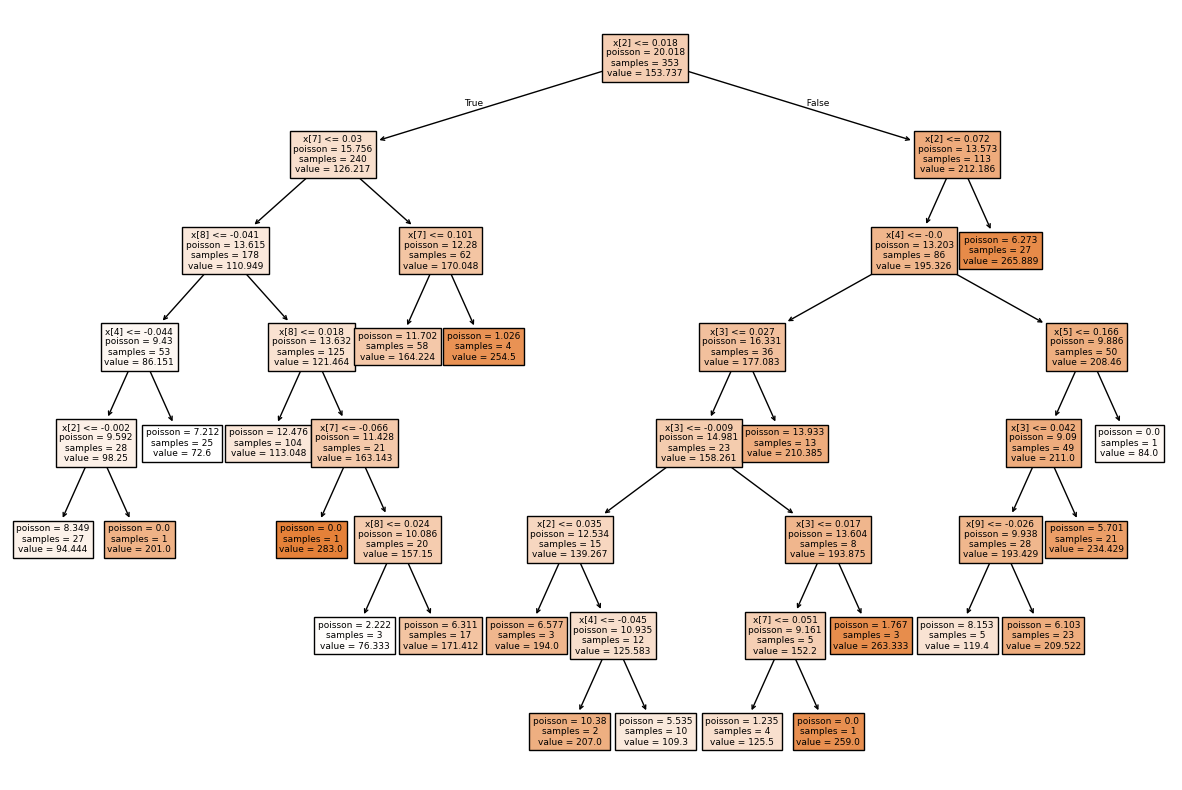

In [18]:
## Visulaize Decision Tree
from sklearn import tree
plt.figure(figsize = (15,10))
tree.plot_tree(tree1, filled = True)